In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno
%matplotlib inline

In [75]:
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [10]:
import opendatasets as od
import pandas as pd
 
od.download(
    "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [11]:
import pandas as pd

df = pd.read_csv(".\pima-indians-diabetes-database\diabetes.csv")
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Find the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# Number of Unique values (Duplicate)
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

The dataset has 768 samples.
There is no null value/missing value.


In [16]:
# Create Nutritional status column

Nutritional_status = pd.Series([]) 

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\1540612615.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [17]:
# Nutritional status based on BMI

for i in range(len(df)): 
    if df['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif df['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif df['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif df['BMI'][i] >= 25 and df['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif df['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= df['BMI'][i] 

In [18]:
# Insert new column - Nutritional Status
df.insert(6, "Nutritional Status", Nutritional_status)

In [19]:
# Check df containing new column
df.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [20]:
df['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

There are 11 women that don't have information about BMI. There are 106 over 758 women have normal weight or underweight.(Around 14%) Most of the women are overweight or obese.

In [21]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 

OGTT_Interpretation = pd.Series([]) 

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\1332369492.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_Interpretation = pd.Series([])


In [22]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(df)): 
    if df['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif df['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif df['Glucose'][i] > 140 & df['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif df['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= df['Glucose'][i] 

In [24]:
# Insert new column - Glucose Result
df.insert(2, "Glucose Result1", OGTT_Interpretation)

In [25]:
df['Glucose Result1'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result1, dtype: int64

From the result, there is no individual from the sample showed OGTT result at "Diabetic levels". 

In [26]:
Impaired_Glucose_Tolerance_Diabetic = ((df ['Glucose'] > 140 ) & (df ['Glucose'] <= 198) & (df ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

From the result, it showed that not every women with impaired glucose tolerance have diabetes. This might be showing that impaired glucose tolerance might be one of the risk of developing diabetes or diabetic.

In [27]:
Normal_Glucose_Diabetic = ((df ['Glucose'] != 0 ) & (df ['Glucose'] <= 140) & (df ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

There are half of the diabetic women showed normal glucose level, which might be concerning.

In [28]:
df.min()

Pregnancies                                          0
Glucose                                              0
Glucose Result1             Impaired Glucose Tolerance
BloodPressure                                        0
SkinThickness                                        0
Insulin                                              0
BMI                                                0.0
Nutritional Status                                  NA
DiabetesPedigreeFunction                         0.078
Age                                                 21
Outcome                                              0
dtype: object

From the data, we can see that the minimun age is 21 years old. And, there are some attributes are not valid as the minimum value is zero such as blood pressure, insulin and etc.

In [29]:
df.max()

Pregnancies                          17
Glucose                             199
Glucose Result1                  Normal
BloodPressure                       122
SkinThickness                        99
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

For the maximum data, we can see that the nutritional status,"Underweight" does not mean "maximum". It was arranged alphabetically.

In [30]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From this output, we know that the data is not balanced as it has more not diabetic than diabetic. 500 not diabetic and 268 are diabetic.

In [31]:
# Check the average of features grouped by Outcome (Diabetes)

df.groupby('Outcome').mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\1411509627.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From the result, we can see that the average number of the features are higher with diabetic women.

In [32]:
df.mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The output might have some skewed or incorrect as there are some missing values(0) for some of the features.

In [33]:
# Shows women that contains information about Glucose

df_glucose = df.loc[df['Glucose'] != 0]

df_glucose

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0
764,2,122,Normal,70,27,0,36.8,Obese,0.340,27,0
765,5,121,Normal,72,23,112,26.2,Overweight,0.245,30,0
766,1,126,Normal,60,0,0,30.1,Obese,0.349,47,1


In [57]:
df_glucose.shape

(763, 12)

From above, we can see that most of the sample have data for glucose as it is an important information(same as insulin)to check on for diabetes.

In [34]:
#Check the average of glucose from the data that is not zero.

df_glucose['Glucose'].mean()

121.6867627785059

This indicates that the average of glucose is at the normal range (less than 140 mg/dl).
Which somehow makes sense as the sampe has more women without diabetics.

In [35]:
df_glucose.groupby('Outcome').mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\2394753086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_glucose.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


#Check the minimum and maximum values of glucose that omits the zero value.

In [36]:
df_glucose['Glucose'].min()

44

In [37]:
df_glucose['Glucose'].max()

199

In [38]:
df_insulin = df.loc[df['Insulin'] != 0]
df_insulin

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
6,3,78,Normal,50,32,88,31.0,Obese,0.248,26,1
8,2,197,Impaired Glucose Tolerance,70,45,543,30.5,Obese,0.158,53,1
13,1,189,Impaired Glucose Tolerance,60,23,846,30.1,Obese,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...,...
753,0,181,Impaired Glucose Tolerance,88,44,510,43.3,Obese,0.222,26,1
755,1,128,Normal,88,39,110,36.5,Obese,1.057,37,1
760,2,88,Normal,58,26,16,28.4,Overweight,0.766,22,0
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0


There are quite a few data for insulin is missing in this sample. Therefore, this will probably change some of our result. This might be a further discussion.

From the sample, there are data with glucose but no insulin information. The maximum of glucose in this dataset is 199, which is diabetic level. However, not a lot of them are with high glucose, this might indicate that they have been taking drugs to control the level. We will require more information on those.

In [39]:
# Shows women that have information about Blood pressure

df_BloodPressure = df.loc[df['BloodPressure'] != 0]
df_BloodPressure

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0
764,2,122,Normal,70,27,0,36.8,Obese,0.340,27,0
765,5,121,Normal,72,23,112,26.2,Overweight,0.245,30,0
766,1,126,Normal,60,0,0,30.1,Obese,0.349,47,1


In [40]:
df_BloodPressure.shape

(733, 11)

In [41]:
# Check the average of blood pressure from data that is not zero

df_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [77]:
# Minimum and Maximum for the Blood Pressure(excluding zero values)

df_BloodPressure['BloodPressure'].min()

24

In [42]:
df_BloodPressure['BloodPressure'].max()

122

There are 35 women that don't have information on blood pressure. The maximum value of Diastolic Blood Pressure(lower number) shows that some women have hypertension (>90 mmHg) as blood pressure target for diabetes is under 140/90 mmHg and under 150/90 mmHg if the person is over 80 years(The British Diabetic Association, n.d.) And, for some people with kidney disease, the target might be 130/80 mmHg.

In this dataset, the Systolic Blood pressure is not included but it should have been as it is an indicator. The reason is the blood pressure can also indicate other diseases, such as kidney disease, heart disease and etc.(U.S. Department of Health & Human Services, 2021) On the other hand, if we look at the minimum value of f Diastolic Blood Pressure (24 mmHg) it is too low and will make people feel dizzy or get tired easily. The  Individual with Diastolic blood pressure less than 80 mmHg has low blood pressure and for older people, it should be between 90 and 60.(Windsor, 2015).

In [43]:
df_insulin = df.loc[df['Insulin'] != 0]

df_insulin

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
6,3,78,Normal,50,32,88,31.0,Obese,0.248,26,1
8,2,197,Impaired Glucose Tolerance,70,45,543,30.5,Obese,0.158,53,1
13,1,189,Impaired Glucose Tolerance,60,23,846,30.1,Obese,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...,...
753,0,181,Impaired Glucose Tolerance,88,44,510,43.3,Obese,0.222,26,1
755,1,128,Normal,88,39,110,36.5,Obese,1.057,37,1
760,2,88,Normal,58,26,16,28.4,Overweight,0.766,22,0
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0


In [44]:
df_insulin.shape

(394, 11)

In [45]:
# check average value of insulin excluding zero value

df_insulin['Insulin'].mean()

155.5482233502538

In [46]:
# Minimum and Maximum of Insulin value

df_insulin['Insulin'].min()

14

In [47]:
df_insulin['Insulin'].max()

846

The normal range of 2 hours insulin if from 16 to 166 mu U/mL. The average for this samples indicate normal range. There are some samples seem to have high insulin level. It might be due to obesity, type 2 diabetes mellitus or the data record in error.

In [49]:
# Check BMI value excluding zero value

df_BMI = df.loc[df['BMI'] != 0]
df_BMI

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0
764,2,122,Normal,70,27,0,36.8,Obese,0.340,27,0
765,5,121,Normal,72,23,112,26.2,Overweight,0.245,30,0
766,1,126,Normal,60,0,0,30.1,Obese,0.349,47,1


In [50]:
df_BMI.shape

(757, 11)

In [51]:
# Check average of BMI excluding zero values

df_BMI['BMI'].mean()

32.457463672391015

The average of BMI showed obesity (BMI >= 30 kg/m2)

In [52]:
#check Minimum and Maximum of BMI(excluding zero)
df_BMI['BMI'].min()

18.2

In [53]:
df_BMI['BMI'].max()

67.1

The minimum value of BMI is 18.2 kg/m 2 is a little closer to underweight for 18.5 kg/m 2. The maximum is showing women with morbid obesity.(BMI >= 40kg/m 2)

In [54]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

df_all = df.loc[(df['BMI'] != 0) & (df['Insulin'] != 0) & (df['BloodPressure'] != 0) & (df['Glucose'] != 0)]
df_all 

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,1
6,3,78,Normal,50,32,88,31.0,Obese,0.248,26,1
8,2,197,Impaired Glucose Tolerance,70,45,543,30.5,Obese,0.158,53,1
13,1,189,Impaired Glucose Tolerance,60,23,846,30.1,Obese,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...,...
753,0,181,Impaired Glucose Tolerance,88,44,510,43.3,Obese,0.222,26,1
755,1,128,Normal,88,39,110,36.5,Obese,1.057,37,1
760,2,88,Normal,58,26,16,28.4,Overweight,0.766,22,0
763,10,101,Normal,76,48,180,32.9,Obese,0.171,63,0


In [55]:
df_all.shape

(392, 11)

From this data filter, we can see that there are only 392 women have all the information for all the attributes. This is around half of the original data. 392/768

In [56]:
df_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

From the filtered data, the women who are not diabetic is 262 and diabetic is 130. The data is still unbalanced.

In [57]:
df_all.mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\3358039925.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.mean()


Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [58]:
df_all.groupby('Outcome').mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\3506241757.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


From above result, the diabetic women have higher number of pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age. The BMI of both groups are high and indicate obesity. The normal range of insulin is (16-166 mu U/mL). However, both groups are showing higher than normal. This might mean that some women in non diabetic group are in risk of having diabetes.

In [59]:
df_all.max()

Pregnancies                          17
Glucose                             198
Glucose Result1                  Normal
BloodPressure                       110
SkinThickness                        63
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

In [60]:
df_all.max()

Pregnancies                          17
Glucose                             198
Glucose Result1                  Normal
BloodPressure                       110
SkinThickness                        63
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

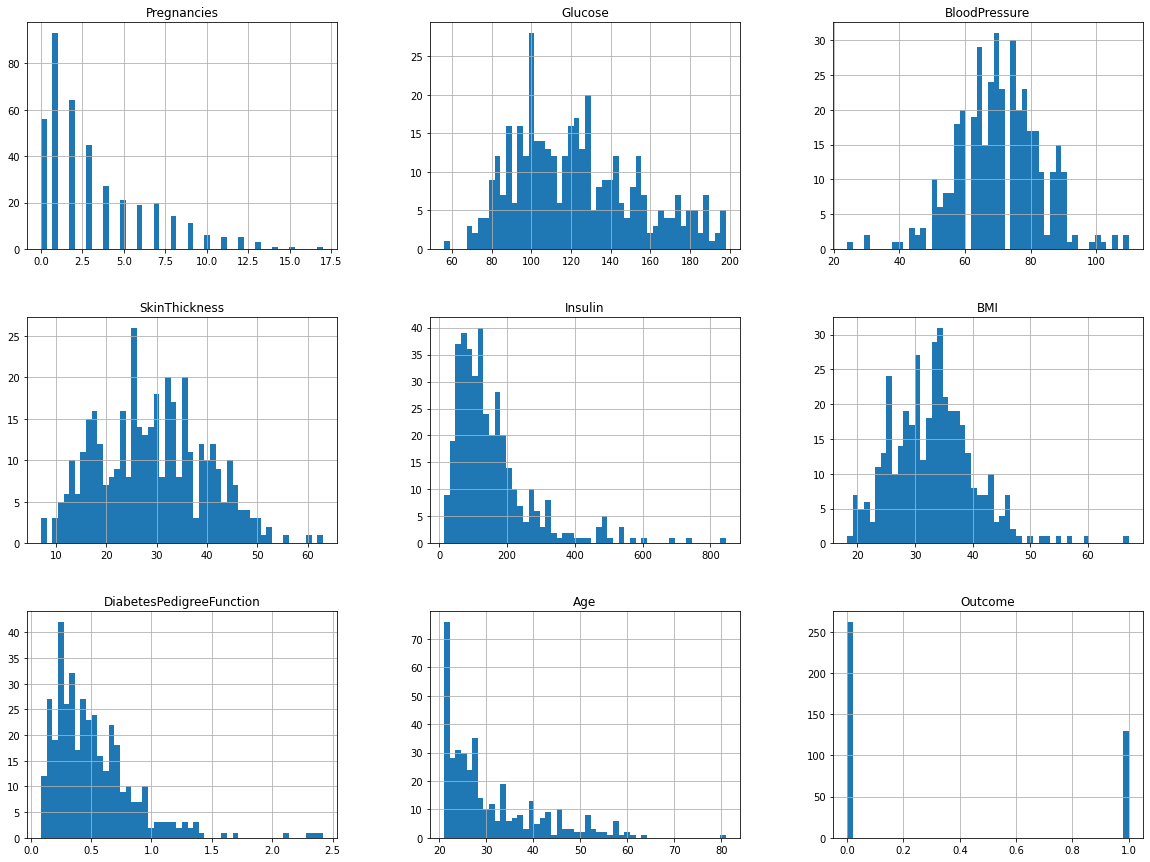

In [61]:
#Histogram (Distribution)

df_all.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\2118785327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins = 20, ax=ax[0,0])
C:\Users\tiffh\AppData\Local\Temp\ipykernel_12512\2118785327.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])


<AxesSubplot:xlabel='BMI', ylabel='Density'>

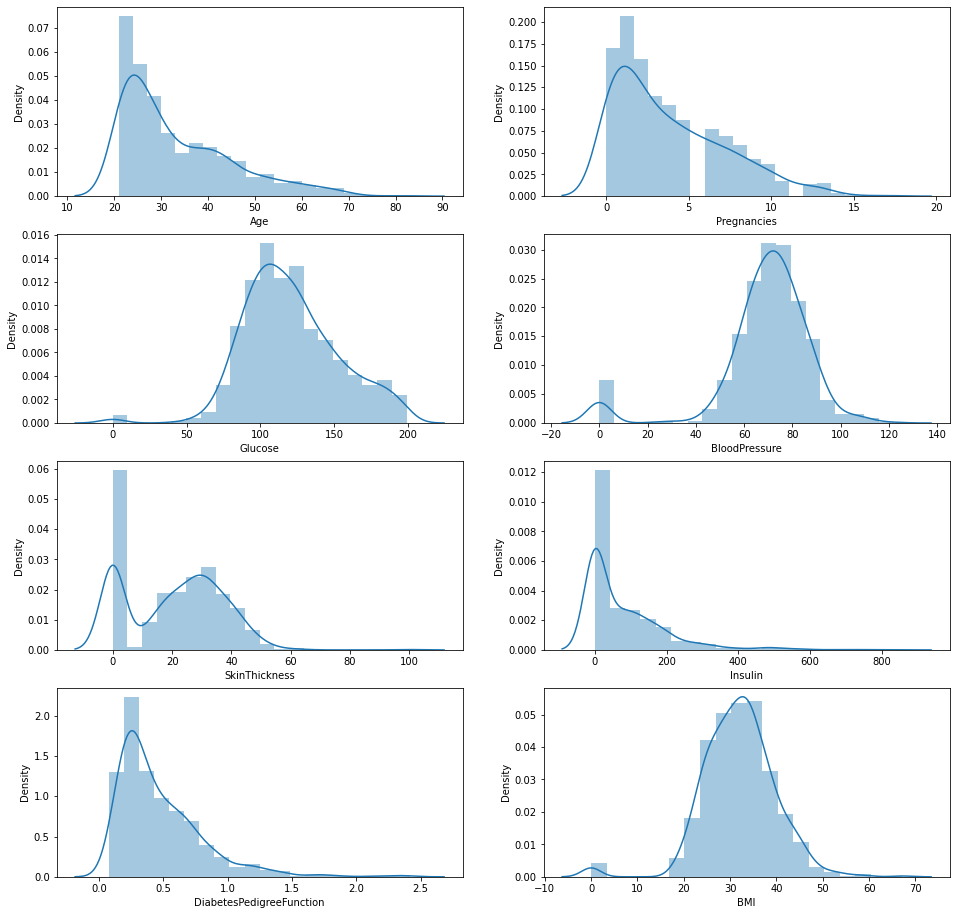

In [62]:
# Histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

Bell shape: BMI and Blood pressure

Right-Skewed: Age, Pregnancies, Insulin,Diabetes Pedigree Function

<AxesSubplot:xlabel='Age'>

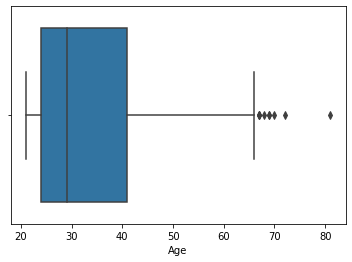

In [63]:
sns.boxplot(x = df["Age"]) 

<AxesSubplot:xlabel='Pregnancies'>

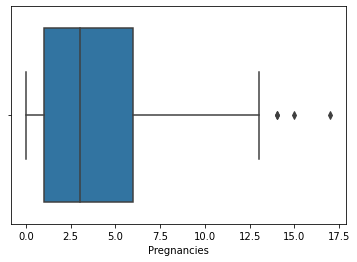

In [110]:
sns.boxplot(x = df["Pregnancies"]) 

<AxesSubplot:xlabel='Glucose'>

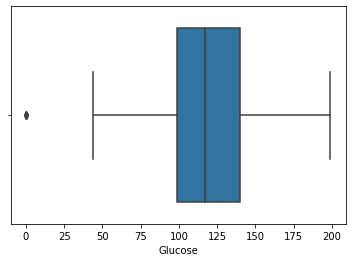

In [111]:
sns.boxplot(x = df["Glucose"]) 

<AxesSubplot:xlabel='BloodPressure'>

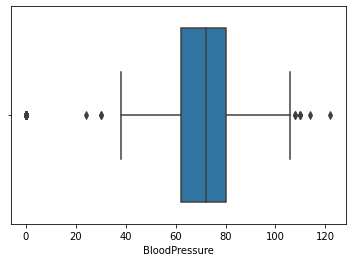

In [112]:
sns.boxplot(x = df["BloodPressure"]) 

<AxesSubplot:xlabel='SkinThickness'>

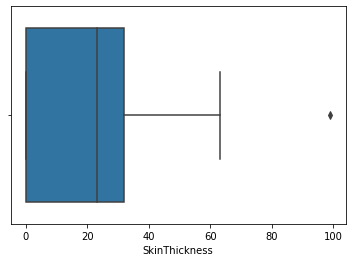

In [113]:
sns.boxplot(x = df["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

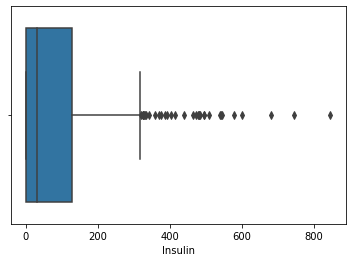

In [114]:
sns.boxplot(x = df["Insulin"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

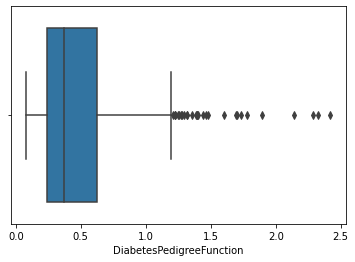

In [115]:
sns.boxplot(x = df["DiabetesPedigreeFunction"]) 

<AxesSubplot:xlabel='BMI'>

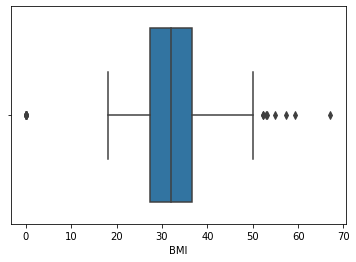

In [64]:
sns.boxplot(x = df["BMI"]) 

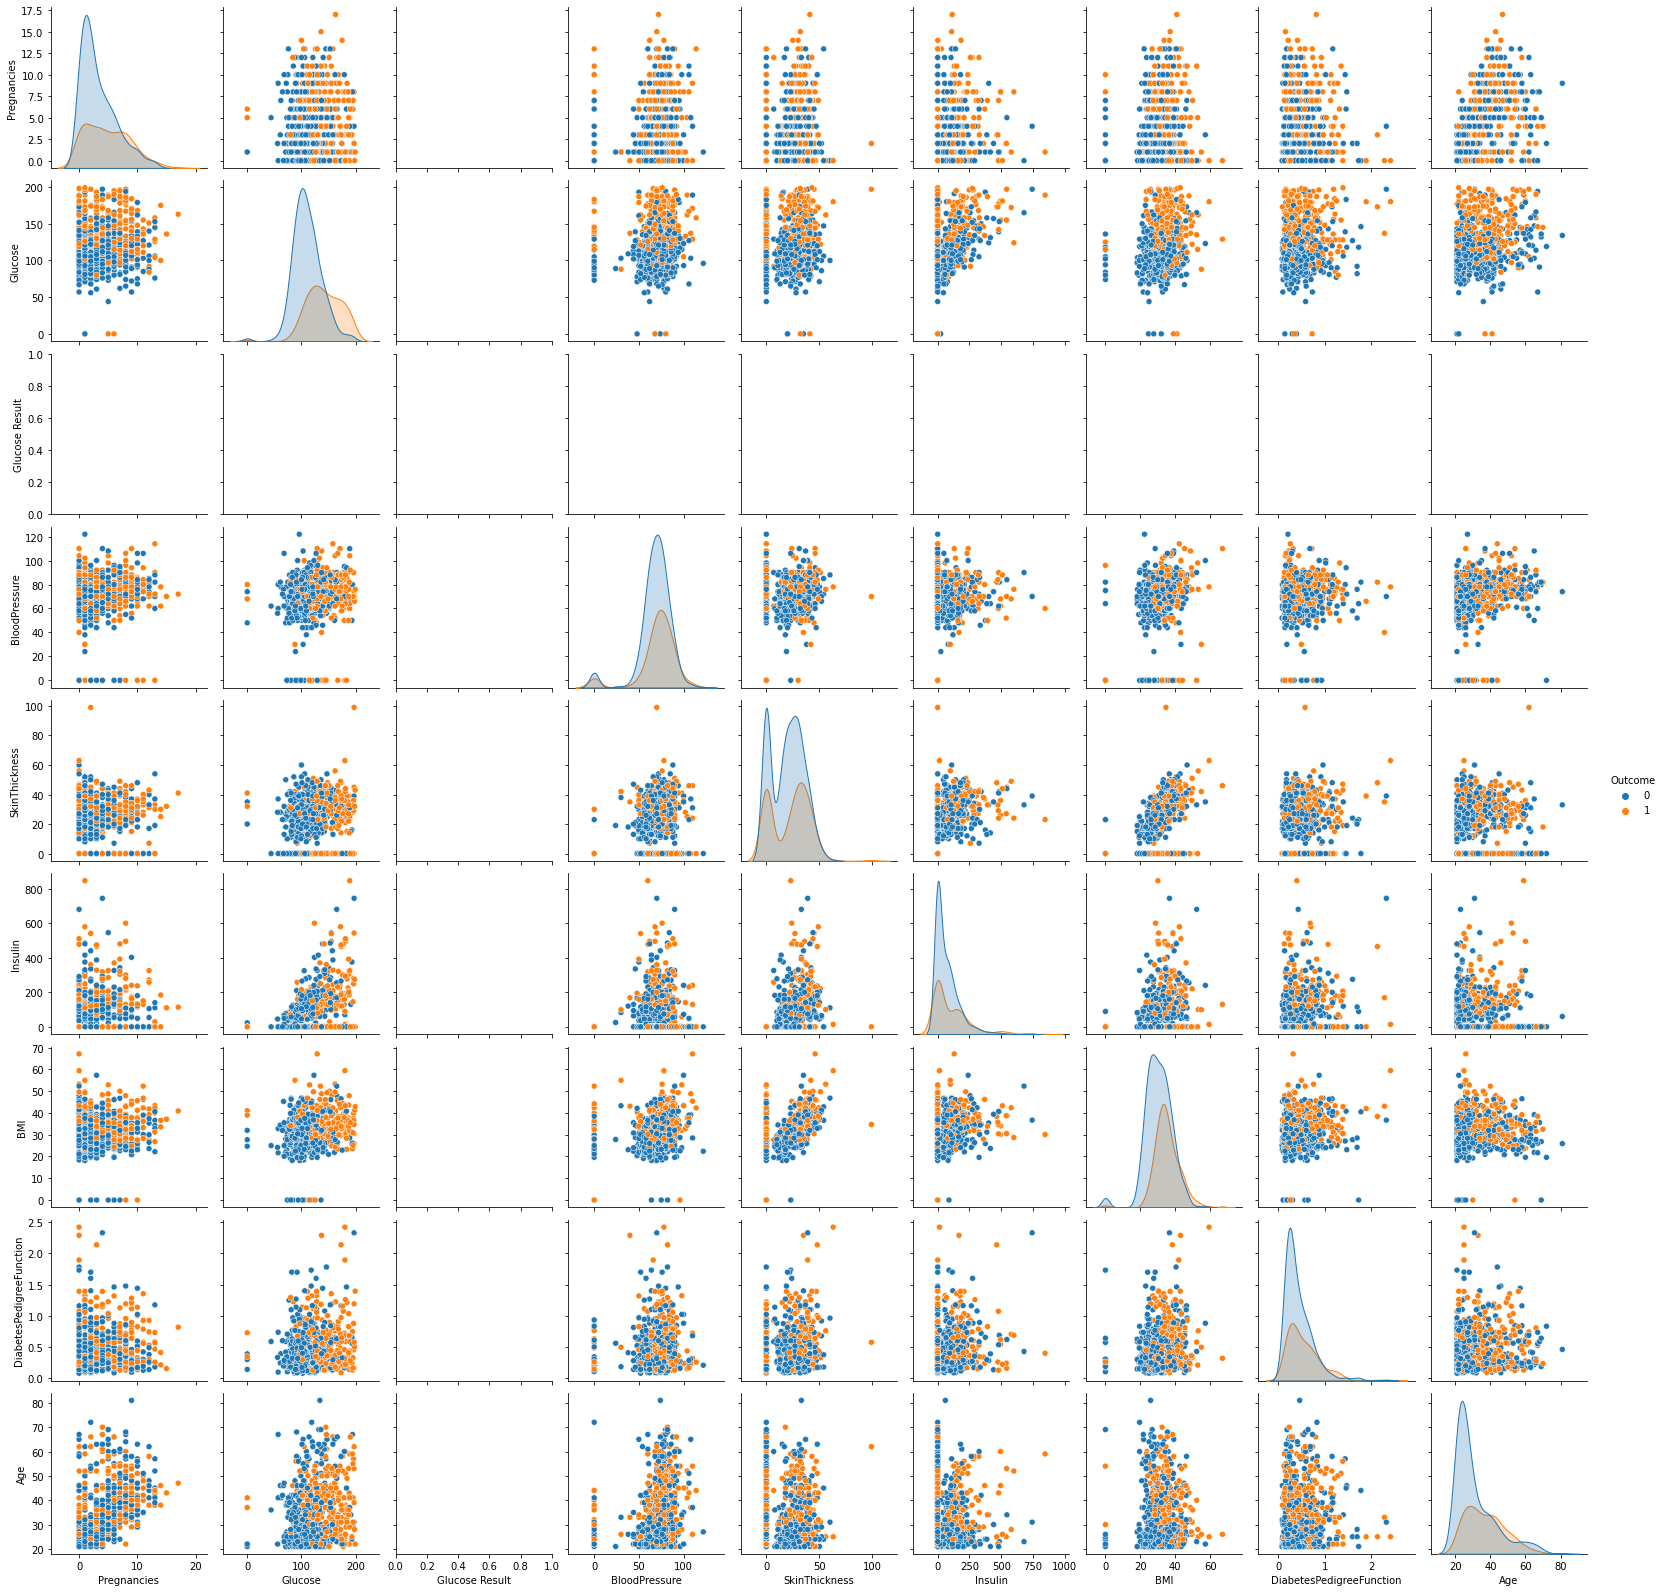

In [118]:
sns.pairplot(df,hue='Outcome')
plt.show()

From the pair plot, it showed that diabetic women have higher value on age, insulin, BMI, skin thickness, blood pressure and pregnancies.

The glucose to diabetes have two distinct group.

In [120]:
# Correlation between the different features

corr_matrix_pearson = df_all.corr(method='pearson')
corr_matrix_pearson

C:\Users\tiffh\AppData\Local\Temp\ipykernel_37032\3407809662.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_pearson = df_all.corr(method='pearson')


,Pregnancies,Glucose,Glucose Result,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,NaN,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,NaN,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
Glucose Result,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,0.213355,0.210027,NaN,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,NaN,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,NaN,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,NaN,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,NaN,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,NaN,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,NaN,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


C:\Users\tiffh\AppData\Local\Temp\ipykernel_37032\1040297187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = df.corr()


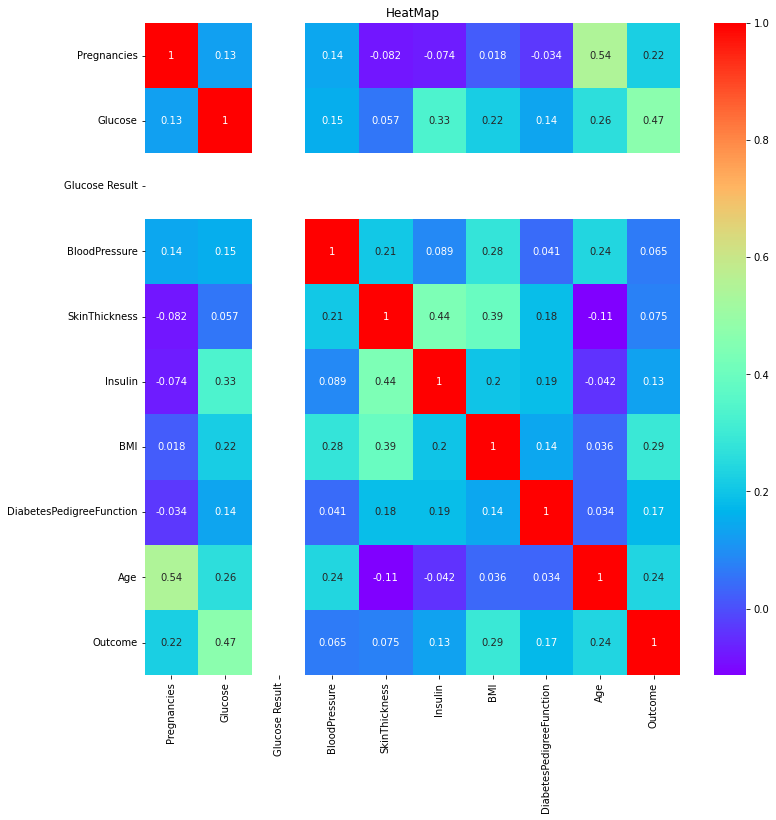

In [119]:
Corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

There are no strong correlation between different categories.(Correlation stronger than 0.7)

Few have higher correlations are:
Age vs Pregnancies (0.68): older women have higher number of pregnancies(positive correlation)

Glucose vs insulin (0.58) (positive correlation)

Glucose vs outcome (0.52) (positive correlation)
Skin fold thickness vs BMI (0.66) (positive correlation)

BMI VS Pregnancies (-0.025) (low negative correlation)

Blood Pressure vs Diabetes Pedigree Function (-0.016) (low negative correlation)

Logistic Regression

In [68]:
# 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=df_all[var1]
y=df_all.Outcome

In [101]:
# Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.09558
Time:                        19:52:26   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

From the table above, it indicated that the model can explain 56% of the variation in dependent variable. We will eliminate the variables that their P-value is greater than 0.05, such as Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age.

In [102]:
var2=["Pregnancies", "Glucose","BloodPressure"]
X=df_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.09558
Time:                        19:52:31   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

From the table above, it indicated that the model can explain 56% of the variation in dependent variable. (A little better than the former one) And, all the P-value is lower than 0.05.

In [103]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=df_all[var2]
y=df_all.Outcome
logreg.fit(X,y)

# Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

# Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



In [82]:
#The accuracy for this three variables is 0.77.

In [105]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]


The confusion matrix shows that 229 + 71 are correct predictions.
And, 59 + 33 are incorrect predictions.

In [114]:
Accuracy = metrics.accuracy_score(y, y_pred)
Precision = metrics.precision_score(y, y_pred)
Sensitivity_recall = metrics.recall_score(y, y_pred)
Specificity = metrics.recall_score(y, y_pred, pos_label=0)
F1_score = metrics.f1_score(y, y_pred)

In [115]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.7653061224489796, 'Precision': 0.6826923076923077, 'Sensitivity_recall': 0.5461538461538461, 'Specificity': 0.8740458015267175, 'F1_score': 0.6068376068376068}
